# Evaluación parcial 1.

Se procede a la importación de las librerias que serán a utilizadas posteriormente.

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Para la evaluación son entregados los siguientes valores
\begin{align}
\\
\end{align}

|f|Hz|50|63|80|100|125|160|200|250|315|400|500|630|800|1000|1250|1600|2000|2500|3150|4000|5000|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|Lp| dB|96,8|99,0|89,7|93,8|95,9|80,2|78,8|67,9|76,5|72,6|79,8|80,6|76,0|73,8|80,2|78,6|83,0|82,8|73,3|73,7|58,1| 

Para facilitar la transcripción de estos datos, primeramente son escritos en excell y a traves de la siguiente función son pasados a Python, como lo es el nivel de presión sonora en ponderación (Z) ubicado en la segunda columna, con su respectiva frecuencia ubicada en la primera columna, y la correción que se le debe aplicar a cada frecuencia para ponderarlo en A en la tercera columna.

In [5]:
df= pd.read_excel('tabla_datos.xlsx',names=['freq', 'Lp','LpAc'])

In [6]:
print(df)

    freq    Lp  LpAc
0     50  96.8 -30.2
1     63  99.0 -26.2
2     80  89.7 -22.5
3    100  93.8 -19.1
4    125  95.9 -16.1
5    160  80.2 -13.4
6    200  78.8 -10.9
7    250  67.9  -8.6
8    315  76.5  -6.6
9    400  72.6  -4.8
10   500  79.8  -3.2
11   630  80.6  -1.9
12   800  76.0  -0.8
13  1000  73.8   0.0
14  1250  80.2   0.6
15  1600  78.6   1.0
16  2000  83.0   1.2
17  2500  82.8   1.3
18  3150  73.3   1.2
19  4000  73.7   1.0
20  5000  58.1   0.5


A traves de la siguiente función podemos definir los datos ingresados como diferentes listas.

In [7]:
freq=df.iloc[:, 0]
Lp=df.iloc[:, 1]
LpAc=df.iloc[:, 2]

## Ejercicio 1: Calculadora de decibeles
+ Desarrollar un código que realice la suma, la resta y el promedio de nivel de presión sonora.
+ Explique el desarrollo del código y sus ecuaciones involucradas.
+ Tomar como referencia $p_{0} = 2\times 10^{-5} \left(\frac{N}{m^2}\right)$.

Se realiza el codigo de la suma de niveles de presión, replicando el orden de las operaciones algebraicas que se presentan en la siguiente ecuación:

$$
SUMA = \log_{10}\sum_{n=1}^{n}10^\frac{Lp_{n}}{10}
\label{eq1}\tag{1}
$$

In [8]:
#suma de Lp
Leq=0                                                         #Se define una variable de prealocado.
for i in range (0,len(Lp)):                                   #Se genera un ciclo for del mismo largo de la cantidades de niveles de presión.
    if i == 0:                                                #If para alocar el primer valor de Lp.
        Leq=Lp[i]                                             
    else:
        Leq=10*np.log10((10**(Leq/10))+(10**(Lp[i]/10)))      #Suma de niveles de presión.
print(Leq)    

103.2404638718704


Se realiza el codigo de la resta de niveles de presión, replicando el orden de las operaciones algebraicas que se presentan en la siguiente ecuación:

$$
RESTA = \log_{10}\Big(\frac{Lp_{1}}{10}-\frac{Lp_{2}}{10}\Big)
\label{eq2}\tag{2}
$$

In [9]:
#resta de Lp (en duda)
Leq=0                                                         #Se define una variable de prealocado.
for i in range (0,len(Lp)):                                   #Se genera un ciclo for del mismo largo de la cantidades de niveles de presión.
    if i == 0:                                                #If para alocar el primer valor de Lp.
        Leq=Lp[i]                                           
    elif Leq >= Lp[i]:
        Leq=10*np.log10((10**(Leq/10))-(10**(Lp[i]/10)))
    else:
        Leq=10*np.log10((10**(Lp[i]/10))-(10**(Leq/10)))
print(Leq)        

94.11440183983315


Se realiza el código de el promedio de niveles de presión, replicando el orden de las operaciones algebraicas que se presentan en la siguiente ecuación:

$$
PROM = \log_{10}\frac{1}{n}\sum_{n=1}^{n}10^\frac{Lp_{n}}{10}
\label{eq3}\tag{3}
$$

In [10]:
#promedio de dB
for i in range (0,len(Lp)):                                   #Ciclo for para recorrer todos los elementos.
    if i == 0:                                                #if para caso inicial.
        Lpsum=10**(Lp[i]/10)                                  
    else:                                                     #else para sumar el resto de elementos.
        Lpsum=(Lpsum)+(10**(Lp[i]/10))
Leqprom=10*np.log10(Lpsum/len(Lp))                            #Promediado.
print(Leqprom)

90.01827092453121


## Ejercicio 2: Conversión de tercio de octava a octava
+ Desarrollar un código que realice la transformacion desde banda tercio de octava a banda de octava y vice versa.
+ Explicar desarrollo del código y sus ecuaciones involucradas.
+ Discutir diferencias entre entre resultados.

Para realizar la transformación de tercio de octava a octava se debe realizar una serie de promedios, con el fin de entregar una información equivalente ,con menor cantidad de datos, donde esto trae como consecuencía la perdida de información exacta en algunas frecuencias. A continuación se presenta la formula de cada promedio a realizar, cada uno de estos indicará el valor por banda de octava que se requiere. 

$$
Lp_{eq} = \frac{Lp_{1}+Lp_{2}+Lp_{3}}{3}
\label{eq4}\tag{4}
$$

In [11]:
#converison de tercio de octava a octava.
freq8=[63,125,250,500,1000,2000,4000]                         #Incorporación frecuencias a utilizar en banda de octava.
sum=0                                                         #Variable inicial.
cont1=0                                                       #Contador.
cont2=0                                                       #Contador.
octava=np.zeros(len(freq8))                                   #Vector de prealocado.
for i in range (0,len(Lp)):                                   #ciclo for que recorre largo de frecuencias en tercio de octava.
    while cont1 < 3:                                          #while para separar elementos en grupos de 3.
        sum=sum+Lp[i]                                         #Suma de los 3 elementos.
        cont1=cont1+1                                         #Contador utilizado para cumplir la condición en el while.
        break
    if cont1 == 3:                                            #If para reiniciar el proceso y promediar los 3 elementos sumados.
        cont1=0                                               #Reiniciador.
        octava[cont2]=sum/3                                   #Promediado.
        cont2=cont2+1                                         #Contador para alocar los nuevos elementos. 
        sum=0                                                 #Reiniciador de sumatoria.
        
print(freq8)
print(octava)

[63, 125, 250, 500, 1000, 2000, 4000]
[95.16666667 89.96666667 74.4        77.66666667 76.66666667 81.46666667
 68.36666667]


El siguiente proceso de convertir de octava a tercio de octava es teóricamente incorrecto, ya que implica una creación de datos inexactos, que no si no fueron medidos con anterioridad, no hay manera de obtenerlos. Pero se realizará el proceso matemático inverso con la suposición de que los 3 elementos de tercio de octava son iguales, y sumados dan el elementos de octava.

In [14]:
#converison de octavas a tercio de octava.
H=np.zeros(len(Lp))
cont=0
for i in range (0,len(freq)):
    if i%3==0 or i==0:
        H[i]=octava[cont]
        H[i+1]=octava[cont]
        H[i+2]=octava[cont]
        cont=cont+1
print(H)

[95.16666667 95.16666667 95.16666667 89.96666667 89.96666667 89.96666667
 74.4        74.4        74.4        77.66666667 77.66666667 77.66666667
 76.66666667 76.66666667 76.66666667 81.46666667 81.46666667 81.46666667
 68.36666667 68.36666667 68.36666667]


A continuación se presenta un gráfico donde se aprecián las claras diferencias del nivel de presión sonora original respecto al estimado a partir de una conversión incorrecta.

Text(0, 0.5, 'Amplitud')

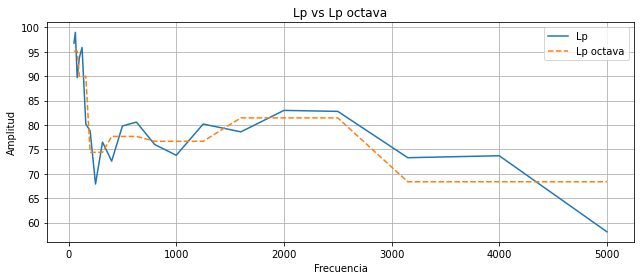

In [15]:
fig,ax = plt.subplots(figsize=(9,4), tight_layout=True)
ax.plot(freq,Lp,linestyle = '-',label = 'Lp')
ax.plot(freq,H,linestyle = '--',label= 'Lp octava')
plt.grid(True)
plt.legend()
ax.set_title('Lp vs Lp octava')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Amplitud')

## Ejercicio 3: Filtro A
+ Desarrollar un código que permita aplicar un filtro con ponderación A a los valores presentados en la tabla 
+ Graficar ambas curvas.
+ Explicar el desarrollo del código y sus ecuaciones involucradas
+ Discutir diferencias entre curvas.

En primer lugar para realizar el cambio de ponderación se ingresa desde el excell la correción por frecuencia que se le debe aplicar al filtro Z para dejarlo como A. De esta manera a traves de una ciclo for se procede a la realización de esta operación elemento a elemento.

Text(0, 0.5, 'Amplitud')

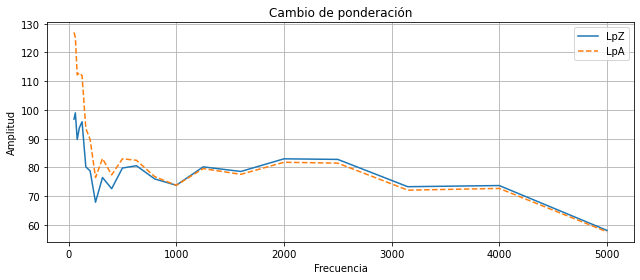

In [16]:
#Cambio de ponderacion Z-A
l=len(Lp)                                                     #Definición de elemento.
LpA=np.zeros(l)                                               #Vector de prealocado.
for i in range (0,l):                                         #Ciclo for que recorre todos los elementos.
    LpA[i]=Lp[i]-LpAc[i]                                      #Aplicación de correción.

fig,ax = plt.subplots(figsize=(9,4), tight_layout=True)       #Grafica.
ax.plot(freq,Lp,linestyle = '-',label = 'LpZ')
ax.plot(freq,LpA,linestyle = '--',label= 'LpA')
plt.grid(True)
plt.legend()
ax.set_title('Cambio de ponderación')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Amplitud')

Es posible ver en 1000 Hz existe una igualidad en las curvas de ponderación, para frecuencias menores, la ponderación A aplica una disminución considerable de hasta 30dB, en cambio para frecuencias mayores se observa un leve aumento debido a la ponderación, lo que refleja el funcionamiento del oido humano, que percibe con mayor intensidad de lo que son, las frecuencias mayores a 1000 Hz, y ocurre el proceso contrario para frecuencias menores a la misma.